# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# List to hold response info
city_list = []


i = 0
set_count = 1
for index, city in enumerate(cities):
    i +=1
    query_url = url +'appid=' + weather_api_key +'&q='+ city + '&units=' + units
    response = requests.get(query_url).json()
    #print(response)
    print(f'Processing Record {index} of Set {set_count} | {city}') 
    if response['cod'] == '404':
        print(f'City not found. Skipping...')
    else:
        city_list.append({
            'City': response['name'],
            'Lat': response['coord']['lat'],
            'Lng': response['coord']['lon'],
            'Max Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Cloudiness': response['clouds']['all'],
            'Wind Speed': response['wind']['speed'],
            'Country': response['sys']['country'],
            'Date': response['dt']
             })
        
    if i == 49:
        i =0
        set_count +=1       

Processing Record 0 of Set 1 | reconquista
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | acari
Processing Record 3 of Set 1 | sao joaquim do monte
Processing Record 4 of Set 1 | gat
Processing Record 5 of Set 1 | sorland
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | alamosa
Processing Record 8 of Set 1 | berlevag
Processing Record 9 of Set 1 | abnub
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | ranong
Processing Record 16 of Set 1 | ennis
Processing Record 17 of Set 1 | copiapo
Processing Record 18 of Set 1 | nanortalik
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | bubaque
Processing Record 21 of Set 1 | upernavik
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | ulladulla
Processing Record 24 of Set 1

Processing Record 187 of Set 4 | bukama
Processing Record 188 of Set 4 | saleaula
City not found. Skipping...
Processing Record 189 of Set 4 | severo-kurilsk
Processing Record 190 of Set 4 | umm lajj
Processing Record 191 of Set 4 | kavieng
Processing Record 192 of Set 4 | lavrentiya
Processing Record 193 of Set 4 | arraial do cabo
Processing Record 194 of Set 4 | deputatskiy
Processing Record 195 of Set 4 | guerrero negro
Processing Record 196 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 197 of Set 5 | kargasok
Processing Record 198 of Set 5 | pevek
Processing Record 199 of Set 5 | teknaf
Processing Record 200 of Set 5 | maceio
Processing Record 201 of Set 5 | kamiiso
Processing Record 202 of Set 5 | pontianak
Processing Record 203 of Set 5 | rocha
Processing Record 204 of Set 5 | wanning
Processing Record 205 of Set 5 | canutama
Processing Record 206 of Set 5 | pangai
Processing Record 207 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 208

Processing Record 368 of Set 8 | kampot
Processing Record 369 of Set 8 | auki
Processing Record 370 of Set 8 | zachepylivka
Processing Record 371 of Set 8 | champerico
Processing Record 372 of Set 8 | owando
Processing Record 373 of Set 8 | shelburne
Processing Record 374 of Set 8 | jardim
Processing Record 375 of Set 8 | hondo
Processing Record 376 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 377 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 378 of Set 8 | vanimo
Processing Record 379 of Set 8 | bowen
Processing Record 380 of Set 8 | zapolyarnyy
Processing Record 381 of Set 8 | tshikapa
Processing Record 382 of Set 8 | temba
Processing Record 383 of Set 8 | honningsvag
Processing Record 384 of Set 8 | odweyne
Processing Record 385 of Set 8 | kristiansund
Processing Record 386 of Set 8 | corn island
Processing Record 387 of Set 8 | dicabisagan
Processing Record 388 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 389 of Set 

Processing Record 555 of Set 12 | hofn
Processing Record 556 of Set 12 | gananoque
Processing Record 557 of Set 12 | souillac
Processing Record 558 of Set 12 | charters towers
Processing Record 559 of Set 12 | tezu
Processing Record 560 of Set 12 | palana
Processing Record 561 of Set 12 | kavaratti
Processing Record 562 of Set 12 | hobyo
Processing Record 563 of Set 12 | ancud
Processing Record 564 of Set 12 | mandalgovi
Processing Record 565 of Set 12 | karangsembung
Processing Record 566 of Set 12 | pattoki
Processing Record 567 of Set 12 | bairiki
Processing Record 568 of Set 12 | kupang
Processing Record 569 of Set 12 | areka
Processing Record 570 of Set 12 | bahawalpur
Processing Record 571 of Set 12 | barcelos
Processing Record 572 of Set 12 | tivaouane
Processing Record 573 of Set 12 | longyan
Processing Record 574 of Set 12 | villa maria
Processing Record 575 of Set 12 | hyeres
Processing Record 576 of Set 12 | zemio
Processing Record 577 of Set 12 | mount gambier
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Convert raw data to DataFrame 
weather_data = pd.DataFrame(city_list)
weather_data

# Export the city data into a .csv.
weather_data.to_csv('../output_data/cities.csv', encoding='utf-8', index=False)

# Display the DataFrame
weather_data

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Finding cities with humidity over 100%
humidity_hundred = (len(weather_data.index[weather_data['Humidity']>100]))
print(f' There are {humidity_hundred} cities in this dataframe with humidity > 100%.')

# Getting max Humidity % using .describe
weather_data.describe()

 There are 0 cities in this dataframe with humidity > 100%.


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,20.398801,13.406260,62.068506,67.643234,57.785589,8.157065,1.650114e+09
std,32.405240,89.019494,24.291984,23.441288,41.033863,5.128885,5.678049e+01
min,-54.800000,-175.200000,-18.400000,1.000000,0.000000,0.000000,1.650113e+09
25%,-6.533900,-60.700000,47.250000,57.000000,11.000000,4.050000,1.650114e+09
50%,22.616300,15.899900,68.180000,72.000000,75.000000,7.000000,1.650114e+09
75%,48.111100,90.220100,80.220000,86.000000,100.000000,11.770000,1.650114e+09
max,78.218600,179.316700,109.450000,100.000000,100.000000,28.770000,1.650114e+09


In [4]:
## Skipping this step as there are no cities with humidity over 100%

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Get the indices of cities that have humidity over 100%.

print(weather_data.index[weather_data['Humidity']>100])

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

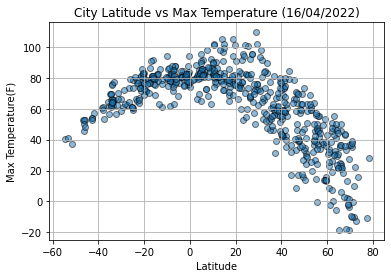

In [50]:
# Latitude vs. Temperature Plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker='o', alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature (16/04/2022)')
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/lat_vs_max_temp.png')
plt.show()

## Latitude vs. Humidity Plot

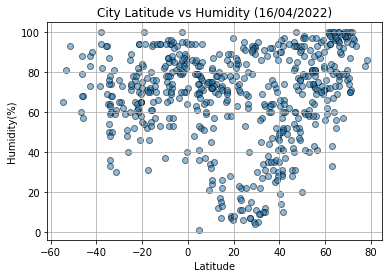

<Figure size 432x288 with 0 Axes>

In [51]:
# Latitude vs. Humidity Plot

plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker='o', alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (16/04/2022)')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
#plt.colorbar
plt.grid(True)
plt.show()
plt.savefig('../output_data/lat_vs_humidity.png')

## Latitude vs. Cloudiness Plot

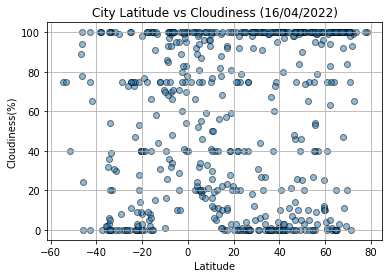

In [52]:
# Latitude vs. Cloudiness Plot
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o',alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (16/04/2022)')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/lat_vs_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

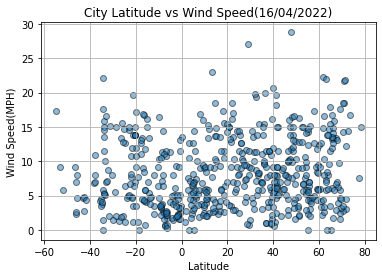

<Figure size 432x288 with 0 Axes>

In [53]:
# Latitude vs. Wind Speed Plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='o', alpha=0.5, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed(16/04/2022)')
plt.ylabel('Wind Speed(MPH)')
plt.xlabel('Latitude')
plt.grid(True)
plt.show()
plt.savefig('../output_data/lat_vs_wind.png')

## Linear Regression

In [54]:
#Creating variables for Northern Hemisphere cities
north_hemi = weather_data.loc[weather_data['Lat'] >= 0]
north_hemi_cities = len(north_hemi)

# Print Northern Hemisphere cities and DataFrame
print(f'In this dataframe there are {north_hemi_cities} cities in the Northern Hemisphere.')
north_hemi

In this dataframe there are 394 cities in the Northern Hemisphere.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Butaritari,3.0707,172.7902,80.56,79,66,12.62,KI,1650113543
4,Kiryat Gat,31.6100,34.7642,80.40,22,6,11.27,IL,1650113544
5,Sørland,67.6670,12.6934,42.84,92,92,13.42,NO,1650113544
6,Albany,42.6001,-73.9662,55.58,60,100,5.23,US,1650113535
7,Alamosa,37.4695,-105.8700,39.06,35,60,7.67,US,1650113544
...,...,...,...,...,...,...,...,...,...
560,Hammerfest,70.6634,23.6821,37.85,87,75,18.41,NO,1650113618
561,Xunchang,28.4543,104.7150,50.20,92,100,0.83,CN,1650113618
562,Ucluelet,48.9329,-125.5528,36.09,90,100,3.18,CA,1650113618
563,Pāsighāt,28.0667,95.3333,69.26,91,18,7.40,IN,1650113618


In [56]:
# Creating variables for Southern Hemisphere cities
south_hemi = weather_data.loc[weather_data['Lat']<0]
south_hemi_cities = len(south_hemi)

# Print Southern Hemisphere cities and DataFrame
print(f'In this dataframe there are {south_hemi_cities} cities in the Southern Hemisphere.')
south_hemi

In this dataframe there are 175 cities in the Southern Hemisphere.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Reconquista,-29.1500,-59.6500,61.18,65,8,5.50,AR,1650113543
2,Acarí,-15.4311,-74.6158,68.83,76,100,4.03,PE,1650113543
3,São Joaquim do Monte,-8.4325,-35.8044,84.34,57,36,7.16,BR,1650113543
10,Ushuaia,-54.8000,-68.3000,40.66,65,75,17.27,AR,1650113311
12,Bluff,-46.6000,168.3333,52.81,60,89,9.19,NZ,1650113544
...,...,...,...,...,...,...,...,...,...
559,Nova Viçosa,-17.8919,-39.3719,76.87,77,100,13.13,BR,1650113617
564,Neiafu,-18.6500,-173.9833,75.88,94,40,0.00,TO,1650113618
565,Brasília de Minas,-16.2064,-44.4333,79.93,61,66,8.50,BR,1650113618
567,Almeirim,-1.5233,-52.5817,82.40,70,41,4.43,BR,1650113618


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of line is y = -1.07x + 97.86
The r-value is: 0.67


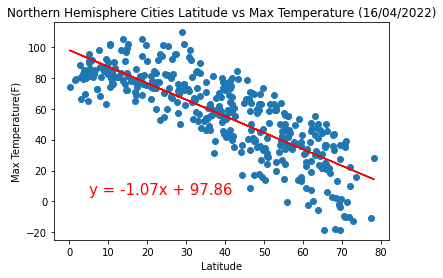

In [65]:
# Creating variable to hold y and x axis
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Northern Hemisphere Cities Latitude vs Max Temperature (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.annotate(line_eq,(5,5), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/north_lat_vs_humidity.png')

# Show the plotted figure
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The equation of line is y = 0.65x + 85.56
The r-value is: 0.63


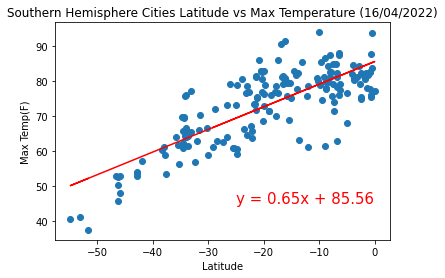

In [66]:
# Creating variable to hold y and x axis
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Southern Hemisphere Cities Latitude vs Max Temperature (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
plt.annotate(line_eq,(-25,45), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/south_lat_vs_max_temp.png')

# Show the plot
plt.show()

# Observations on Cities in Southern and Northern Hemisphere Max Temp vs Latitude Linear Regression:

#### In the above two scatter plots with linear regression lines analysing the relationship between Max Temp vs Latitude the data shows

 - there is somewhat of a positive linear relationship with Max Temp and Latitudes in the Northern Hemisphere cities with an r-value of 0.67
 - there is somewhat of a positive linear relationship with Max Temp and Latitudes in the Southern Hemisphere cities with an r-value of 0.63

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of line is y = 0.38x + 50.9
The r-value is: 0.09


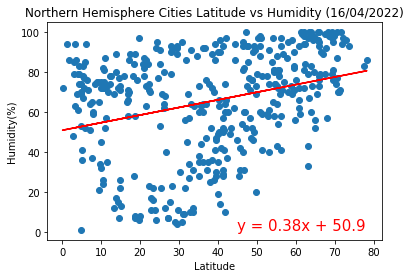

In [73]:
# Creating variable to hold y and x axis
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Northern Hemisphere Cities Latitude vs Humidity (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.annotate(line_eq,(45,1), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/north_lat_vs_humidity.png')

# Show the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The equation of line is y = 0.22x + 76.94
The r-value is:0.04


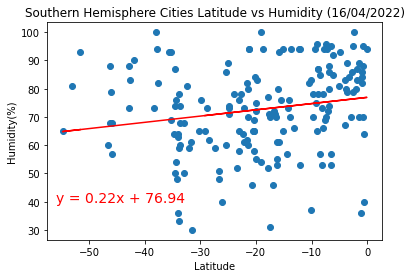

In [68]:
# Creating variable to hold y and x axis
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is:{round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Southern Hemisphere Cities Latitude vs Humidity (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.annotate(line_eq,(-56,40), fontsize=14, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/south_lat_vs_humidity.png')

# Show the plotted figure
plt.show()

# Observations Southern Hemisphere and Northern Hemisphere Humidity vs Latitude Linear Regression:

#### In the above two scatter plots with linear regression lines analysing the relationship between Humidity vs Latitude the data shows

 - no linear relationship with Humidity and Latitudes in the Northern Hemisphere cities with an r-value of 0.09
 - no linear relationship with Humidity and Latitudes in the Southern Hemisphere cities with an r-value of 0.04

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The equation of line is y = 0.29x + 48.69
The r-value is: 0.02


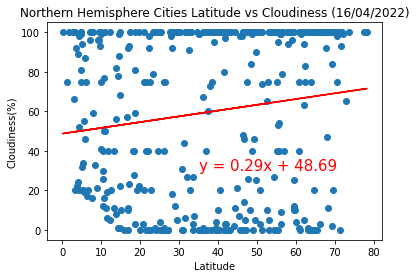

In [69]:
# Creating variable to hold y and x axis
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Northern Hemisphere Cities Latitude vs Cloudiness (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.annotate(line_eq,(35, 30), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/north_lat_vs_cloudiness.png')

# Show the plotted figure
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.77x + 68.08
The r-value is: 0.07


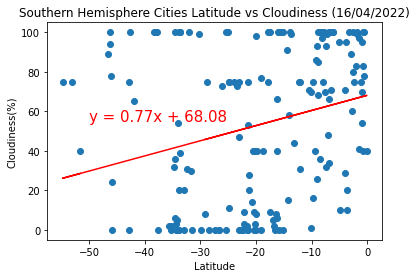

In [70]:
# Creating variable to hold y and x axis
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(line_eq)

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Southern Hemisphere Cities Latitude vs Cloudiness (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.annotate(line_eq,(-50,55), fontsize=15, color='red')

#Save the plotted figure as .png
plt.savefig('../output_data/south_lat_vs_cloudiness.png')

# Show the plotted figure
plt.show()

# Observations Southern Hemisphere and Northern Hemisphere Cloudiness vs Latitude Linear Regression:


#### In the above two scatter plots with linear regression lines analysing the relationship between Humidity vs Latitude the data shows

 - no linear relationship with Cloudiness and Latitudes in the Northern Hemisphere cities with an r-value of 0.02
 - no linear relationship with Cloudiness and Latitudes in the Southern Hemisphere cities with an r-value of 0.07

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of line is y = 0.03x + 7.38
The r-value is: 0.02


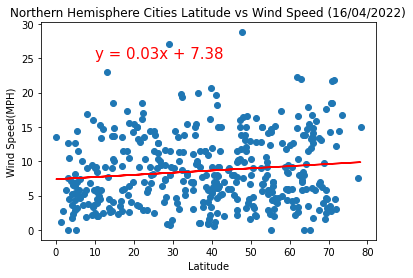

In [72]:
# Creating variable to hold y and x axis
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Northern Hemisphere Cities Latitude vs Wind Speed (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.annotate(line_eq,(10,25), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/north_lat_vs_wind_speed.png')

# Show the plotted figure
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The equation of line is y = -0.08x + 5.68
The r-value is: 0.04


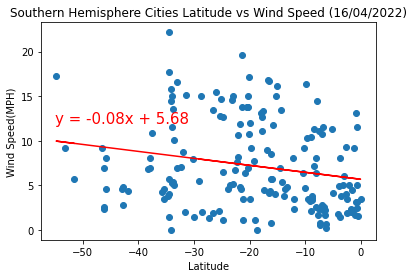

In [71]:
# Creating variable to hold y and x axis
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']

# Perform Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
print(f'The equation of line is {line_eq}')

# Print r value
print(f'The r-value is: {round(rvalue**2, 2)}')

# Plot Linea Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.title('Southern Hemisphere Cities Latitude vs Wind Speed (16/04/2022)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.annotate(line_eq,(-55, 12), fontsize=15, color='red')

# Save the plotted figure as .png
plt.savefig('../output_data/south_lat_vs_wind_speed.png')

# Show the plotted figure
plt.show()

## Observations Southern Hemisphere and Northern Hemisphere Wind Speed vs Latitude Linear Regression:


#### In the above two scatter plots with linear regression lines analysing the relationship between Humidity vs Latitude the data shows

 - no linear relationship with Wind Speed and Latitudes in the Northern Hemisphere cities with an r-value of 0.02
 - no linear relationship with Wind Speed and Latitudes in the Southern Hemisphere cities with an r-value of 0.04

# WeatherPy Analysis

- The strongest positive linear relationship in all the above plots is between Max Temp and Latitude for both Nortern and Southern Hemisphere.

- The random sampling generated 175 cities in the Southern Hemisphere and 394 cities in the Northern Hemisphere. This seems disproportionate and could skew the results. After investigating further I found that this is due to the Northern Hemisphere having more land area than the Southern Hemisphere and the majority of the world's population and largest cities are in the Northern Hemisphere. The random cities were generated using citipy. A better distribution across both hemispheres could give a different result.
